In [59]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

--2025-02-01 11:15:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-02-01 11:15:49 (89.1 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [60]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [61]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2025-02-01 11:15:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  20.3MB/s    in 9.2s    

2025-02-01 11:15:59 (17.5 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [62]:
unzip_data("10_food_classes_10_percent.zip")

In [63]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [64]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image_dataset_from_directory
from keras.applications import EfficientNetB0
from tensorflow.keras import layers

In [65]:
IMG_SIZE= (224, 224)
BATCH_SIZE= 32

In [66]:
train_data = image_dataset_from_directory(
    directory=train_dir,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    label_mode ="categorical"
)

test_data = image_dataset_from_directory(
    directory=test_dir,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    label_mode ="categorical"
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [67]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2),
])

In [68]:
base_model = EfficientNetB0(include_top =False)

base_model.trainable = False

inputs = keras.layers.Input(shape=(224,224, 3), name = "input_shape")

x = data_augmentation(inputs)
x = base_model(x, training = False)
x = layers.GlobalAveragePooling2D(name = "global_average_pooling_2D")(x)
outputs = layers.Dense(10, activation="softmax", name = "output_layer")(x)

model = keras.Model(inputs, outputs)

In [69]:
model.compile(
    loss="categorical_crossentropy",
    optimizer = "Adam",
    metrics = ["accuracy"]
)

In [70]:
checkpoint_path = "ten_percent_model_checkpoint_weights/checkpoint.weights.h5"

checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_path,
    save_weights_only=True,
    save_best_only=False,
    save_freq="epoch",
    verbose =1
)

In [71]:
history = model.fit(
    train_data,
    epochs = 10,
    validation_data = test_data,
    validation_steps = int(len(test_data)),
    callbacks = [checkpoint_callback]
)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.2281 - loss: 2.1368
Epoch 1: saving model to ten_percent_model_checkpoint_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 28s 676ms/step - accuracy: 0.2330 - loss: 2.1299 - val_accuracy: 0.6980 - val_loss: 1.4162
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.6943 - loss: 1.3989
Epoch 2: saving model to ten_percent_model_checkpoint_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 572ms/step - accuracy: 0.6941 - loss: 1.3961 - val_accuracy: 0.7840 - val_loss: 0.9897
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.7623 - loss: 1.0434
Epoch 3: saving model to ten_percent_model_checkpoint_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 359ms/step - accuracy: 0.7625 - loss: 1.0418 - val_accuracy: 0.8196 - val_loss: 0.7900
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.7806 - loss: 0.8841
Epoch 4: saving model to ten_percent_model_checkpo

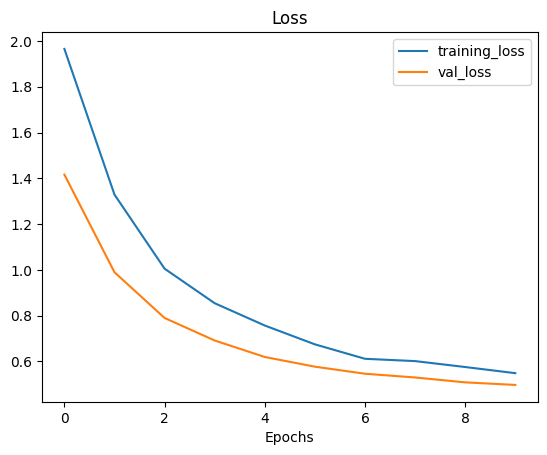

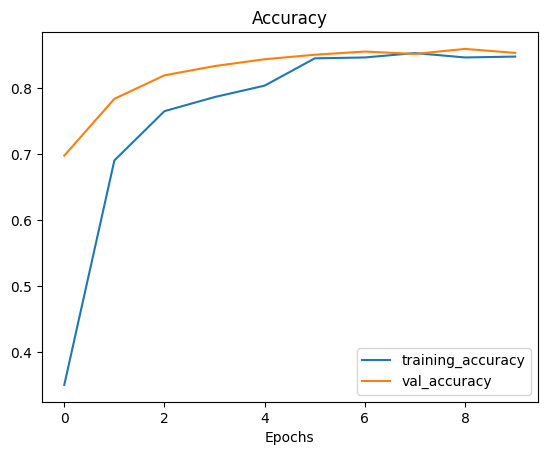

In [72]:
plot_loss_curves(history)

In [73]:
for layer in model.layers:
  print(layer, layer.trainable)

<InputLayer name=input_shape, built=True> True
<Sequential name=sequential_1, built=True> True
<Functional name=efficientnetb0, built=True> False
<GlobalAveragePooling2D name=global_average_pooling_2D, built=True> True
<Dense name=output_layer, built=True> True


In [74]:
for i, layer in enumerate(model.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_layer_2 False
1 rescaling_2 False
2 normalization_1 False
3 rescaling_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [75]:
base_model.trainable = True

for layer in base_model.layers[:-20]:
  layer.trainable = False

In [76]:
model.compile(
    loss="categorical_crossentropy",
    optimizer = keras.optimizers.Adam(0.0001),
    metrics = ["accuracy"]
)

In [77]:
for i, layer in enumerate(model.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_layer_2 False
1 rescaling_2 False
2 normalization_1 False
3 rescaling_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [78]:
history_2 = model.fit(
    test_data,
    epochs = 20,
    validation_data = test_data,
    validation_steps = int(len(test_data)),
    initial_epoch = history.epoch[-1],
    callbacks= [],
)

Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 36s 284ms/step - accuracy: 0.7019 - loss: 1.0152 - val_accuracy: 0.8808 - val_loss: 0.3855
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 189ms/step - accuracy: 0.8265 - loss: 0.6303 - val_accuracy: 0.9020 - val_loss: 0.3225
Epoch 12/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 189ms/step - accuracy: 0.8663 - loss: 0.4791 - val_accuracy: 0.9152 - val_loss: 0.2801
Epoch 13/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 254ms/step - accuracy: 0.8660 - loss: 0.4262 - val_accuracy: 0.9304 - val_loss: 0.2415
Epoch 14/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 184ms/step - accuracy: 0.8765 - loss: 0.3833 - val_accuracy: 0.9360 - val_loss: 0.2210
Epoch 15/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 185ms/step - accuracy: 0.9021 - loss: 0.3211 - val_accuracy: 0.9456 - val_loss: 0.1874
Epoch 16/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 183ms/step - accuracy: 0.9056 - loss: 0.2925 - val_accuracy: 0.9544 - val_loss: 0.1656
Epoch 17/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 183ms/step - accuracy: 0.9088 - loss: 0.2935 - 

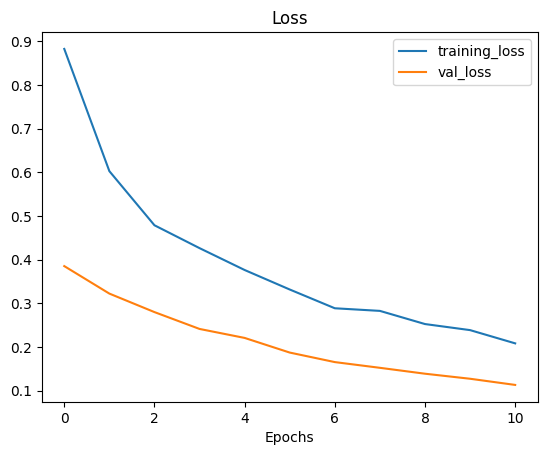

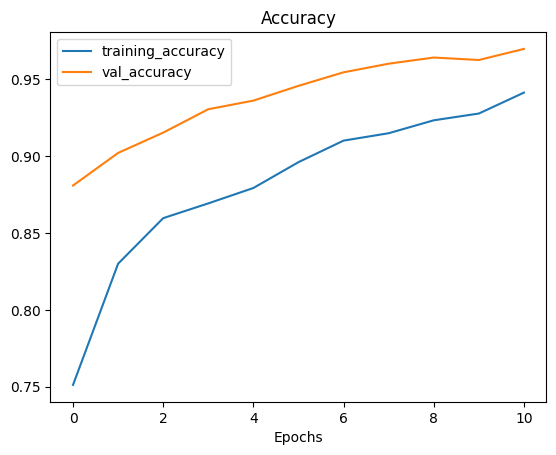

In [79]:
plot_loss_curves(history_2)

In [80]:
model.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.9745 - loss: 0.1047


[0.11333291232585907, 0.9696000218391418]

In [81]:
base_model.trainable = True

for layer in base_model.layers[:-30]:
  layer.trainable = False

In [82]:
for i, layer in enumerate(model.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_layer_2 False
1 rescaling_2 False
2 normalization_1 False
3 rescaling_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [83]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ["accuracy"]
)

In [84]:
history_3 = model.fit(
    train_data,
    epochs = 30,
    validation_data= test_data,
    validation_steps = int(len(test_data)),
    initial_epoch = history_2.epoch[-1],
    callbacks = []
)

Epoch 20/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 25s 515ms/step - accuracy: 0.8574 - loss: 0.4229 - val_accuracy: 0.9704 - val_loss: 0.1087
Epoch 21/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 372ms/step - accuracy: 0.8660 - loss: 0.3990 - val_accuracy: 0.9688 - val_loss: 0.1089
Epoch 22/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 365ms/step - accuracy: 0.8807 - loss: 0.3791 - val_accuracy: 0.9688 - val_loss: 0.1141
Epoch 23/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 559ms/step - accuracy: 0.9080 - loss: 0.2870 - val_accuracy: 0.9656 - val_loss: 0.1192
Epoch 24/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 353ms/step - accuracy: 0.9136 - loss: 0.2832 - val_accuracy: 0.9644 - val_loss: 0.1215
Epoch 25/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 550ms/step - accuracy: 0.9189 - loss: 0.3030 - val_accuracy: 0.9644 - val_loss: 0.1225
Epoch 26/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 557ms/step - accuracy: 0.9354 - loss: 0.2217 - val_accuracy: 0.9632 - val_loss: 0.1206
Epoch 27/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 336ms/step - accuracy: 0.9307 - loss: 0.2395 - 

In [85]:
print(history_2.epoch)

[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [86]:
model.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.9673 - loss: 0.1215


[0.1281307488679886, 0.9635999798774719]